# Chapter 3.3 - Exploratory Data Analysis
This notebook contains the code that was used for the EDA conducted in Chapter 3.2 of the thesis. After having done some initialization steps, it focuses on an overall comparison of the available datasets in order to derive dataset groups. Next, the notebook includes the code for the individual analyses for the three datasets that were chosen as prototypes, i.e., C4, C1 and C6.

## Initialization & Imports

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import lag_plot
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
import matplotlib
matplotlib.rc_file_defaults()

In [ ]:
# settings for unified format across plots
import matplotlib.pylab as pylab
params = {'legend.fontsize': 20,
          'figure.figsize': (9, 6),
         'axes.labelsize': 16,
         'xtick.labelsize': 14,
         'ytick.labelsize': 14}
pylab.rcParams.update(params)

## Overall comparison for Group Definition
In this part, all six available datasets get imported and compared to each other. Based on this, the group definition depicted in Chapter 3.3 was derived.

In [ ]:
# import all datasets and merge them into one DataFrame
worksheet = gc.open('C1').sheet1

rows = worksheet.get_all_values()

# create DataFrame that includes all data on WON_REVENUE from first dataset
df = pd.DataFrame.from_records(rows[1:],columns=rows[0])
df = df[df['METRIC']=="WON_REVENUE"]
df['VALUE'] = pd.to_numeric(df['VALUE'])
df['DATE'] = pd.to_datetime(df['DATE'])

# remove splits i.e., group data only by date and metric
df = pd.DataFrame(df.groupby(['DATE','METRIC'])['VALUE'].sum())
df = df.reset_index()

# pivot data
df = df.pivot(index=['DATE'],columns=['METRIC'],values=['VALUE'])
df.columns = ['C1']

# created overall DataFrame
won_revenue = df.copy()

for i in range(2,7):
  worksheet = gc.open('C'+str(i)).sheet1

  rows = worksheet.get_all_values()

  # create DataFrame that includes all data on WON_REVENUE from each of the remaining five datasets
  df = pd.DataFrame.from_records(rows[1:],columns=rows[0])
  df = df[df['METRIC']=="WON_REVENUE"]
  df['VALUE'] = pd.to_numeric(df['VALUE'])
  df['DATE'] = pd.to_datetime(df['DATE'])

  # remove splits i.e., group data only by date and metric
  df = pd.DataFrame(df.groupby(['DATE','METRIC'])['VALUE'].sum())
  df = df.reset_index()

  # pivot data
  df = df.pivot(index=['DATE'],columns=['METRIC'],values=['VALUE'])
  df.columns = ['C'+str(i)]

  # append DataFrame to overall DataFrame - thereby ensure, that length of the DataFrame is equal to longest dataset, so that no values are lost
  if len(df) > len(won_revenue):
    won_revenue = df.join(won_revenue)
  else:
    won_revenue = won_revenue.join(df)

# reorder DataFrame
won_revenue = won_revenue[['C1','C2','C3','C4','C5','C6']]

print("Number of columns in overall dataset:",len(won_revenue.columns))

Number of columns in overall dataset: 6


### Full series

In [ ]:
# plot datasets together
won_revenue.plot(figsize=(16,10))
plt.xlabel('DATE', fontsize=20)
plt.ylabel('WON_REVENUE', fontsize=20)
plt.grid(axis='y');

In [ ]:
# plot datasets separately
fig, axs = plt.subplots(2, 3, figsize=(20,10),sharex=True,sharey=True)
axs[0, 0].plot(won_revenue[['C1']])
axs[0, 0].set_title('C1', fontsize=20)
axs[0, 1].plot(won_revenue[['C2']])
axs[0, 1].set_title('C2', fontsize=20)
axs[0, 2].plot(won_revenue[['C3']])
axs[0, 2].set_title('C3', fontsize=20)
axs[1, 0].plot(won_revenue[['C4']])
axs[1, 0].set_title('C4', fontsize=20)
axs[1, 1].plot(won_revenue[['C5']])
axs[1, 1].set_title('C5', fontsize=20)
axs[1, 2].plot(won_revenue[['C6']])
axs[1, 2].set_title('C6', fontsize=20)

for ax in axs.flat:
    ax.set(xlabel='DATE', ylabel='WON_REVENUE')
    ax.grid(axis='y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
for col in won_revenue:
  print("first period for",col,":",won_revenue[col].dropna().index.min())

In [ ]:
# print summary statistics
won_revenue.describe()

In [ ]:
# show boxplot for all revenue series
sns.set(rc={'figure.figsize':(16,6)})
sns.boxplot(data=won_revenue);

### 2 years

In [ ]:
# shorten series to only include most recent two years of data
won_revenue_shortened = won_revenue.iloc[-24:,:]

In [ ]:
# plot datasets together
won_revenue_shortened.plot(figsize=(16,10))
plt.xlabel('DATE', fontsize=20)
plt.ylabel('WON_REVENUE', fontsize=20)
plt.grid(axis='y');

In [ ]:
# plot datasets separately
fig, axs = plt.subplots(2, 3, figsize=(20,10),sharex=True,sharey=True)
axs[0, 0].plot(won_revenue_shortened[['C1']])
axs[0, 0].set_title('C1', fontsize=20)
axs[0, 1].plot(won_revenue_shortened[['C2']])
axs[0, 1].set_title('C2', fontsize=20)
axs[0, 2].plot(won_revenue_shortened[['C3']])
axs[0, 2].set_title('C3', fontsize=20)
axs[1, 0].plot(won_revenue_shortened[['C4']])
axs[1, 0].set_title('C4', fontsize=20)
axs[1, 1].plot(won_revenue_shortened[['C5']])
axs[1, 1].set_title('C5', fontsize=20)
axs[1, 2].plot(won_revenue_shortened[['C6']])
axs[1, 2].set_title('C6', fontsize=20)

for ax in axs.flat:
    ax.set(xlabel='DATE', ylabel='WON_REVENUE')
    ax.grid(axis='y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
sns.set(rc={'figure.figsize':(16,6)})
sns.boxplot(data=won_revenue_shortened);

In [ ]:
# print summary statistics
won_revenue_shortened.describe()

## Group-specific EDA
This part covers the code for the Group-specific EDA, i.e. the analysis of each of the group prototypes in order to get an intuition which model might be required for each group prototype.

### C4

In [ ]:
# load dataset
worksheet = gc.open('C4').sheet1
rows = worksheet.get_all_values()

# create DataFrame that includes all data on WON_REVENUE from the dataset
df = pd.DataFrame.from_records(rows[1:],columns=rows[0])
df['VALUE'] = pd.to_numeric(df['VALUE'])
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

In [ ]:
# remove splits i.e., group data only by date and metric
df = pd.DataFrame(df.groupby(['DATE','METRIC'])['VALUE'].sum())
df = df.reset_index()
df

In [ ]:
# use only train set, i.e., remove data from 2022
df = df[df['DATE']<pd.Timestamp('2022-01-01')]

In [ ]:
# pivot data
df = df.pivot(index=['DATE'],columns=['METRIC'],values=['VALUE'])
df.columns = [col[1] for col in df.columns]
df

In [ ]:
# print summary statistics
df.describe()

In [ ]:
# ensuring that no empty values are present in the data
print('Number of NaN values in CREATED_OPPORTUNITIES:',len(df[df['CREATED_OPPORTUNITIES'].isnull()]))
print('Number of NaN values in THREE_MONTHS_ACV:',len(df[df['THREE_MONTHS_ACV'].isnull()]))
print('Number of NaN values in THREE_MONTHS_OPP_WON_CVR:',len(df[df['THREE_MONTHS_OPP_WON_CVR'].isnull()]))
print('Number of NaN values in WON_CUSTOMERS:',len(df[df['WON_CUSTOMERS'].isnull()]))
print('Number of NaN values in WON_REVENUE:',len(df[df['WON_REVENUE'].isnull()]))

Number of NaN values in CREATED_OPPORTUNITIES: 0
Number of NaN values in THREE_MONTHS_ACV: 0
Number of NaN values in THREE_MONTHS_OPP_WON_CVR: 0
Number of NaN values in WON_CUSTOMERS: 0
Number of NaN values in WON_REVENUE: 0


In [ ]:
# scale data to get an overview of the distribution of each metric
minMax = MinMaxScaler()
df_scaled = pd.DataFrame(minMax.fit_transform(df),index=df.index,columns=df.columns)
df_scaled.head()

,CREATED_OPPORTUNITIES,THREE_MONTHS_ACV,THREE_MONTHS_OPP_WON_CVR,WON_CUSTOMERS,WON_REVENUE
DATE,,,,,
2014-08-01,0.001878,0.001275,0.125,0.003990,0.005896
2014-09-01,0.001127,0.000950,0.125,0.002394,0.001135
2014-10-01,0.000000,0.000950,0.125,0.000000,0.000000
2014-11-01,0.001127,0.000389,0.125,0.002394,0.001024
2014-12-01,0.000000,0.000369,0.125,0.000000,0.000000


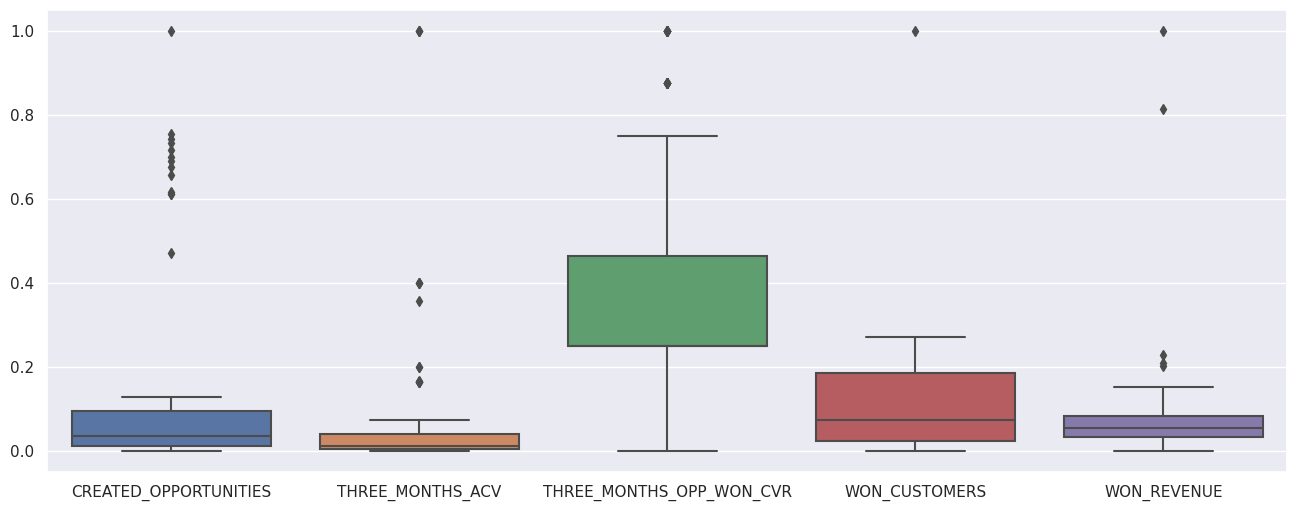

In [ ]:
sns.set(rc={'figure.figsize':(16,6)})
sns.boxplot(data=df_scaled);

In [ ]:
# print variance per metric (unscaled)
df.var()

In [ ]:
# print variance per metric (scaled)
df_scaled.var()

CREATED_OPPORTUNITIES       0.057372
THREE_MONTHS_ACV            0.037718
THREE_MONTHS_OPP_WON_CVR    0.080547
WON_CUSTOMERS               0.016833
WON_REVENUE                 0.018257
dtype: float64

In [ ]:
# create new DataFrame which only includes WON_REVENUE
won_revenue = df[['WON_REVENUE']].copy()
won_revenue_scaled = df_scaled[['WON_REVENUE']].copy()
won_revenue.head()

In [ ]:
# plot wo_revenue
won_revenue.plot(figsize=(15,7.5))
plt.grid(axis='y')
plt.xlabel('DATE', fontsize=20)
plt.ylabel('WON_REVENUE', fontsize=20)
plt.show()

In [ ]:
# print boxplot only for WON_REVENUE
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(data=won_revenue);

In [ ]:
# print a lag plot
lag_plot(won_revenue)
plt.grid()
plt.show()

In [ ]:
# execute time-series decomposition and plot the result
result=seasonal_decompose(won_revenue['WON_REVENUE'], model='additive', period=12)
result.plot()
plt.show()

In [ ]:
# plot the ACF for the residuals of the decomposition
plot_acf(result.resid.dropna(),lags=24, title='Resid ACF')
plt.show()

In [ ]:
# ADF test to test autocorrelation within the residuals
ad_fuller_result = adfuller(result.resid.dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.473595027227986
p-value: 1.348180808048594e-08


-> result indicates stationary residuals

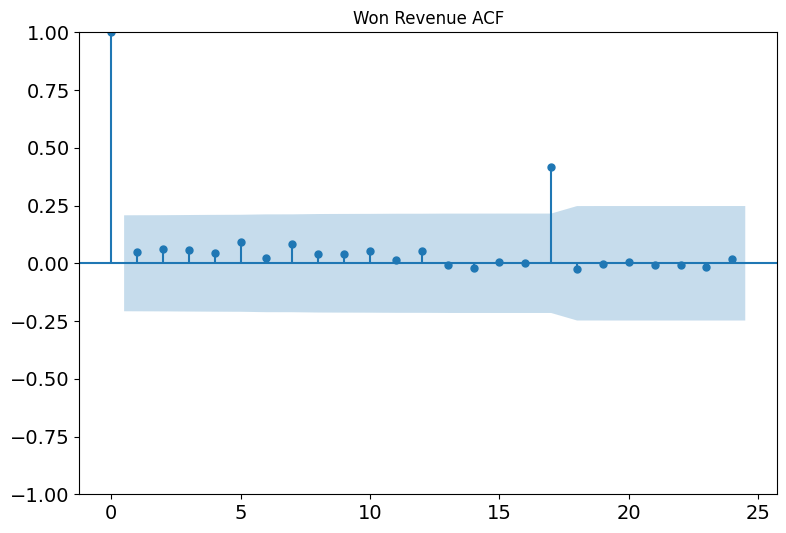

In [ ]:
# plot ACF for WON_REVENUE
plot_acf(won_revenue,lags=24, title='Won Revenue ACF')
plt.show()

In [ ]:
# ADF test to test autocorrelation within WON_REVENUE
ad_fuller_result = adfuller(won_revenue)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -8.854322715614037
p-value: 1.5425627014211757e-14


-> result still indicates stationary residuals

C4

In [ ]:
# load dataset
worksheet = gc.open('C4').sheet1
rows = worksheet.get_all_values()

# create DataFrame that includes all data on WON_REVENUE from the dataset
df = pd.DataFrame.from_records(rows[1:],columns=rows[0])
df['VALUE'] = pd.to_numeric(df['VALUE'])
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

In [ ]:
# remove splits i.e., group data only by date and metric
df = pd.DataFrame(df.groupby(['DATE','METRIC'])['VALUE'].sum())
df = df.reset_index()
df

In [ ]:
# use only train set, i.e., remove data from 2022
df = df[df['DATE']<pd.Timestamp('2022-01-01')]

In [ ]:
# pivot data
df = df.pivot(index=['DATE'],columns=['METRIC'],values=['VALUE'])
df.columns = [col[1] for col in df.columns]
df

In [ ]:
# print summary statistics
df.describe()

In [ ]:
# ensuring that no empty values are present in the data
print('Number of NaN values in CREATED_OPPORTUNITIES:',len(df[df['CREATED_OPPORTUNITIES'].isnull()]))
print('Number of NaN values in THREE_MONTHS_ACV:',len(df[df['THREE_MONTHS_ACV'].isnull()]))
print('Number of NaN values in THREE_MONTHS_OPP_WON_CVR:',len(df[df['THREE_MONTHS_OPP_WON_CVR'].isnull()]))
print('Number of NaN values in WON_CUSTOMERS:',len(df[df['WON_CUSTOMERS'].isnull()]))
print('Number of NaN values in WON_REVENUE:',len(df[df['WON_REVENUE'].isnull()]))

Number of NaN values in CREATED_OPPORTUNITIES: 0
Number of NaN values in THREE_MONTHS_ACV: 0
Number of NaN values in THREE_MONTHS_OPP_WON_CVR: 0
Number of NaN values in WON_CUSTOMERS: 0
Number of NaN values in WON_REVENUE: 0


In [ ]:
# scale data to get an overview of the distribution of each metric
minMax = MinMaxScaler()
df_scaled = pd.DataFrame(minMax.fit_transform(df),index=df.index,columns=df.columns)
df_scaled.head()

,CREATED_OPPORTUNITIES,THREE_MONTHS_ACV,THREE_MONTHS_OPP_WON_CVR,WON_CUSTOMERS,WON_REVENUE
DATE,,,,,
2014-08-01,0.001878,0.001275,0.125,0.003990,0.005896
2014-09-01,0.001127,0.000950,0.125,0.002394,0.001135
2014-10-01,0.000000,0.000950,0.125,0.000000,0.000000
2014-11-01,0.001127,0.000389,0.125,0.002394,0.001024
2014-12-01,0.000000,0.000369,0.125,0.000000,0.000000


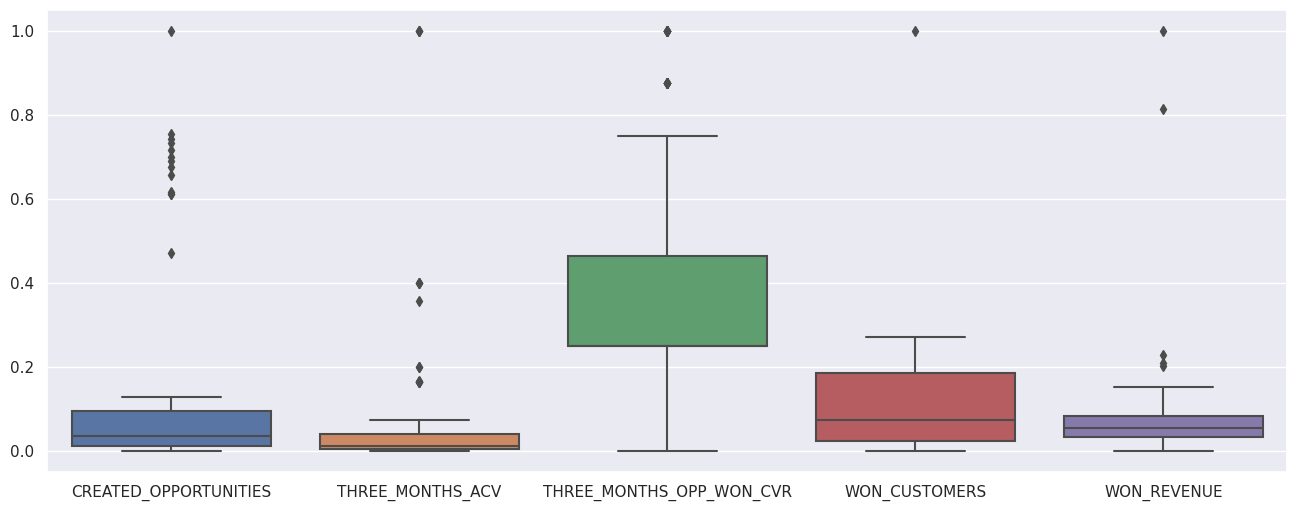

In [ ]:
sns.set(rc={'figure.figsize':(16,6)})
sns.boxplot(data=df_scaled);

In [ ]:
# print variance per metric (unscaled)
df.var()

In [ ]:
# print variance per metric (scaled)
df_scaled.var()

CREATED_OPPORTUNITIES       0.057372
THREE_MONTHS_ACV            0.037718
THREE_MONTHS_OPP_WON_CVR    0.080547
WON_CUSTOMERS               0.016833
WON_REVENUE                 0.018257
dtype: float64

In [ ]:
# create new DataFrame which only includes WON_REVENUE
won_revenue = df[['WON_REVENUE']].copy()
won_revenue_scaled = df_scaled[['WON_REVENUE']].copy()
won_revenue.head()

,WON_REVENUE
DATE,
2014-08-01,411.75
2014-09-01,79.25
2014-10-01,0.00
2014-11-01,71.50
2014-12-01,0.00


In [ ]:
# plot wo_revenue
won_revenue.plot(figsize=(15,7.5))
plt.grid(axis='y')
plt.xlabel('DATE', fontsize=20)
plt.ylabel('WON_REVENUE', fontsize=20)
plt.show()

In [ ]:
# print boxplot only for WON_REVENUE
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(data=won_revenue);

In [ ]:
# print lag plot
lag_plot(won_revenue)
plt.grid()
plt.show()

In [ ]:
# execute time-series decomposition and plot the result
result=seasonal_decompose(won_revenue['WON_REVENUE'], model='additive', period=12)
result.plot()
plt.show()

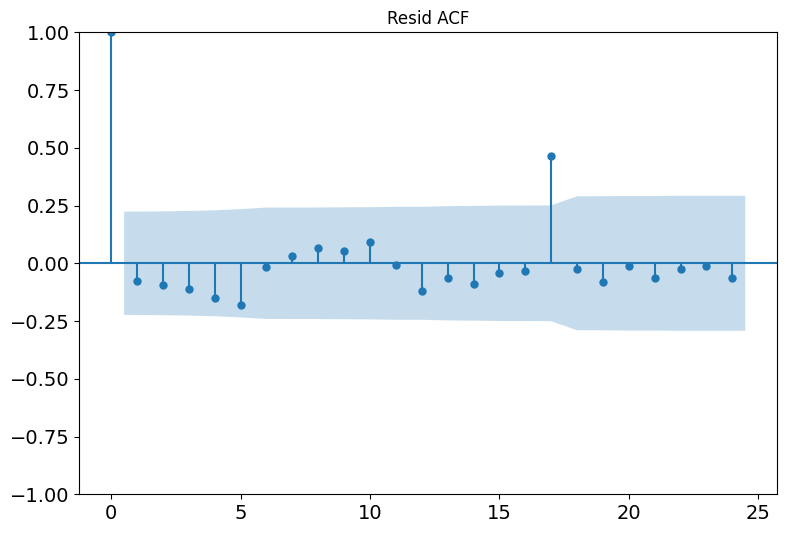

In [ ]:
# plot the ACF for the residuals of the decomposition
plot_acf(result.resid.dropna(),lags=24, title='Resid ACF')
plt.show()

In [ ]:
# ADF test to test autocorrelation within the residuals
ad_fuller_result = adfuller(result.resid.dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.473595027227986
p-value: 1.348180808048594e-08


-> result indicates stationary residuals

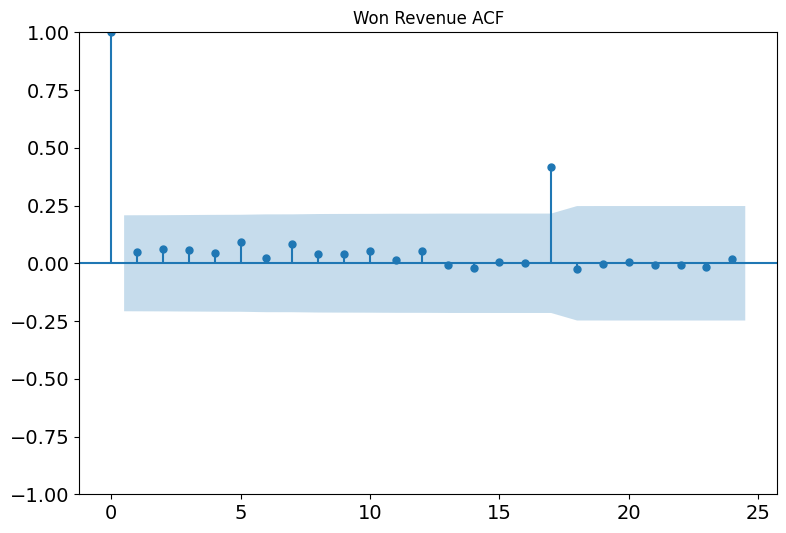

In [ ]:
# plot ACF for WON_REVENUE
plot_acf(won_revenue,lags=24, title='Won Revenue ACF')
plt.show()

In [ ]:
# ADF test to test autocorrelation within WON_REVENUE
ad_fuller_result = adfuller(won_revenue)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -8.854322715614037
p-value: 1.5425627014211757e-14


In [ ]:
won_revenue_shortened = won_revenue[-24:]

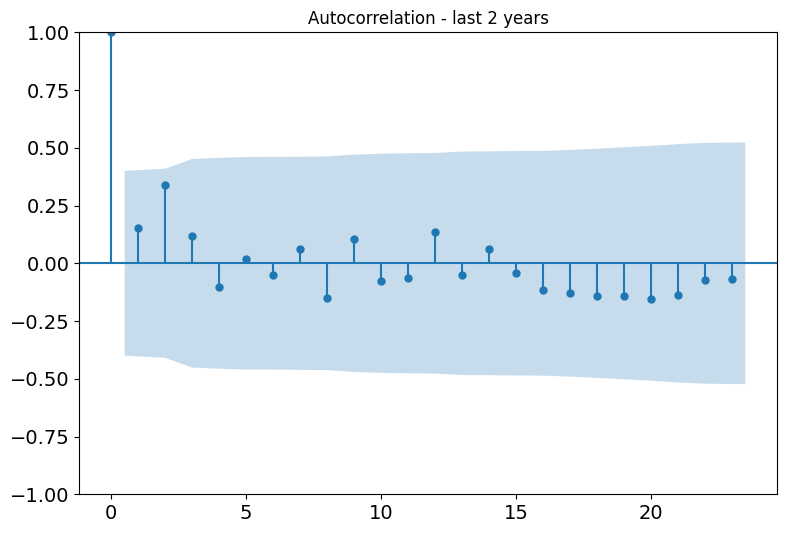

In [ ]:
plot_acf(won_revenue_shortened,lags=23,title='Autocorrelation - last 2 years');

In [ ]:
ad_fuller_result = adfuller(won_revenue_shortened["WON_REVENUE"])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.0136237405068114
p-value: 0.7482629797225187


### C6

In [ ]:
# load dataset
worksheet = gc.open('C6').sheet1
rows = worksheet.get_all_values()

# create DataFrame that includes all data on WON_REVENUE from the dataset
df = pd.DataFrame.from_records(rows[1:],columns=rows[0])
df['VALUE'] = pd.to_numeric(df['VALUE'])
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

In [ ]:
# remove splits i.e., group data only by date and metric
df = pd.DataFrame(df.groupby(['DATE','METRIC'])['VALUE'].sum())
df = df.reset_index()
df

In [ ]:
# use only train set, i.e., remove data from 2022
df = df[df['DATE']<pd.Timestamp('2022-01-01')]

In [ ]:
# pivot data
df = df.pivot(index=['DATE'],columns=['METRIC'],values=['VALUE'])
df.columns = [col[1] for col in df.columns]
df

In [ ]:
# print summary statistics
df.describe()

In [ ]:
# ensuring that no empty values are present in the data
print('Number of NaN values in CREATED_OPPORTUNITIES:',len(df[df['CREATED_OPPORTUNITIES'].isnull()]))
print('Number of NaN values in THREE_MONTHS_ACV:',len(df[df['THREE_MONTHS_ACV'].isnull()]))
print('Number of NaN values in THREE_MONTHS_OPP_WON_CVR:',len(df[df['THREE_MONTHS_OPP_WON_CVR'].isnull()]))
print('Number of NaN values in WON_CUSTOMERS:',len(df[df['WON_CUSTOMERS'].isnull()]))
print('Number of NaN values in WON_REVENUE:',len(df[df['WON_REVENUE'].isnull()]))

Number of NaN values in CREATED_OPPORTUNITIES: 0
Number of NaN values in THREE_MONTHS_ACV: 0
Number of NaN values in THREE_MONTHS_OPP_WON_CVR: 0
Number of NaN values in WON_CUSTOMERS: 0
Number of NaN values in WON_REVENUE: 0


In [ ]:
# scale data to get an overview of the distribution of each metric
minMax = MinMaxScaler()
df_scaled = pd.DataFrame(minMax.fit_transform(df),index=df.index,columns=df.columns)
df_scaled.head()

,CREATED_OPPORTUNITIES,SIX_MONTHS_ACV,SIX_MONTHS_OPP_WON_CVR,THREE_MONTHS_ACV,THREE_MONTHS_OPP_WON_CVR,WON_CUSTOMERS,WON_REVENUE
DATE,,,,,,,
2016-06-01,0.05,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2016-07-01,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2016-08-01,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2016-09-01,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2016-10-01,0.20,0.010129,0.060606,0.007062,0.055555,0.25,0.009133


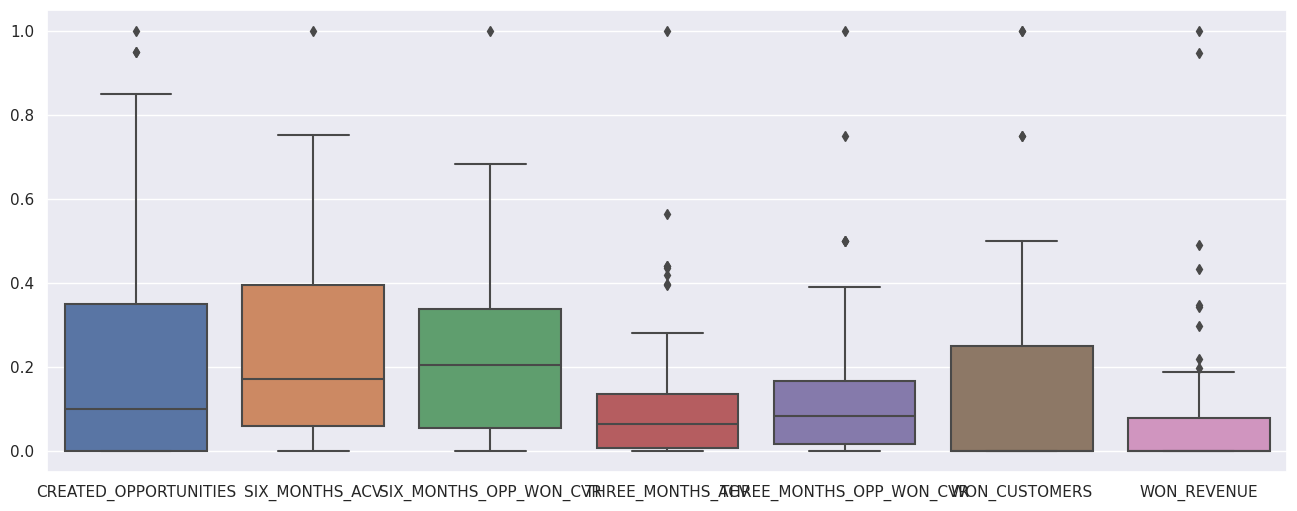

In [ ]:
# print boxplot across metrics
sns.set(rc={'figure.figsize':(16,6)})
sns.boxplot(data=df_scaled);

In [ ]:
# print variance per metric (unscaled)
df.var()

In [ ]:
# print variance per metric (scaled)
df_scaled.var()

CREATED_OPPORTUNITIES       0.078709
SIX_MONTHS_ACV              0.059840
SIX_MONTHS_OPP_WON_CVR      0.041257
THREE_MONTHS_ACV            0.030322
THREE_MONTHS_OPP_WON_CVR    0.034442
WON_CUSTOMERS               0.060041
WON_REVENUE                 0.036711
dtype: float64

In [ ]:
# create new DataFrame which only includes WON_REVENUE
won_revenue = df[['WON_REVENUE']].copy()
won_revenue_scaled = df_scaled[['WON_REVENUE']].copy()
won_revenue.head()

In [ ]:
# plot WON_REVENUE
won_revenue.plot(figsize=(15,7.5))
plt.grid(axis='y')
plt.title('C6',fontsize=20)
plt.xlabel('DATE', fontsize=20)
plt.ylabel('WON_REVENUE', fontsize=20)
plt.show()

In [ ]:
# print boxplot only for WON_REVENUE
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(data=won_revenue);

In [ ]:
# print lag plot
lag_plot(won_revenue)
plt.grid()
plt.show()

In [ ]:
# execute time-series decomposition and plot the result
result=seasonal_decompose(won_revenue['WON_REVENUE'], model='additive', period=12)
result.plot();

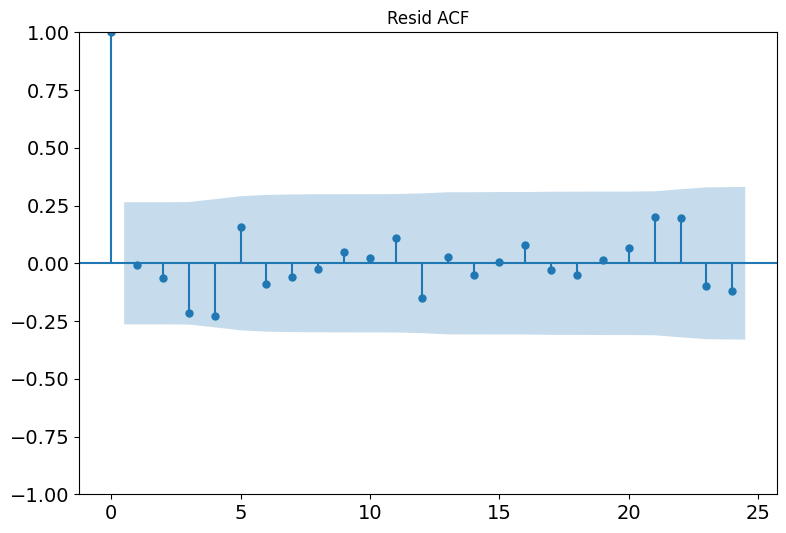

In [ ]:
# plot the ACF for the residuals of the decomposition
plot_acf(result.resid.dropna(),lags=24, title='Resid ACF')
plt.show()

In [ ]:
# ADF test to test autocorrelation within the residuals
ad_fuller_result = adfuller(result.resid.dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.240962753932546
p-value: 0.0005612427145595004


-> result indicates stationarity

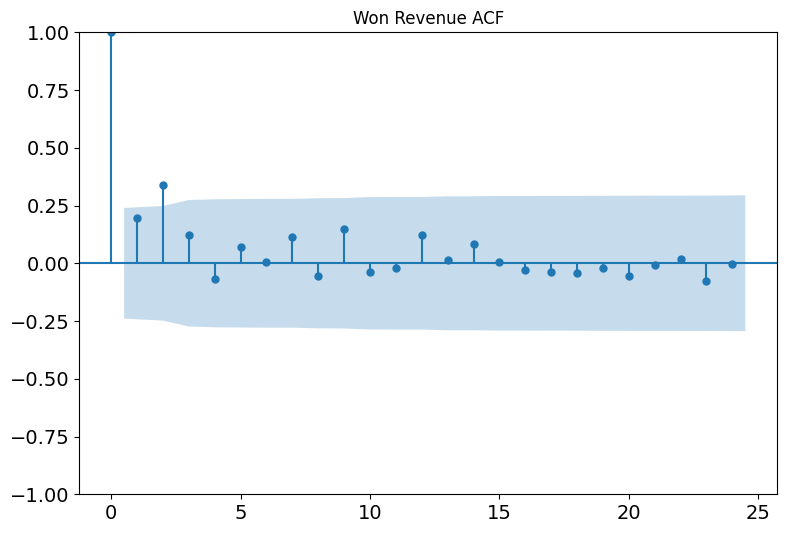

In [ ]:
# plot ACF for WON_REVENUE
plot_acf(won_revenue,lags=24, title='Won Revenue ACF')
plt.show()

In [ ]:
# ADF test to test autocorrelation within WON_REVENUE
ad_fuller_result = adfuller(won_revenue)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.7589135879300991
p-value: 0.990943158209373


-> result indicated the series needs differencing

In [ ]:
# ADF test on differenced series (d=1)
ad_fuller_result = adfuller(won_revenue.diff(1).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.302781383613198
p-value: 0.1710724891088269


In [ ]:
# ADF test on seasonally differenced series (D=1)
ad_fuller_result = adfuller(won_revenue.diff(12).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.057963358079175
p-value: 0.26175004864615203


In [ ]:
# ADF test on multiply differenced series (d=2)
ad_fuller_result = adfuller(won_revenue.diff(1).dropna().diff(1).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -8.424905698364748
p-value: 1.9386398427373245e-13


In [ ]:
# ADF test on multiply differenced series (d=1, D=1)
ad_fuller_result = adfuller(won_revenue.diff(1).dropna().diff(12).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -12.336012674485335
p-value: 6.270861679917537e-23


-> results indicate to use combined differencing

In [ ]:
# plot differenced series
plt.figure(figsize=[15, 7.5])
plt.plot(won_revenue.diff(1).dropna().diff(12).dropna())
plt.ylabel('WON_REVENUE diff')
plt.xlabel('DATE')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [ ]:
# shorten series to retain only most recent 2 years
won_revenue_shortened = won_revenue[-24:]

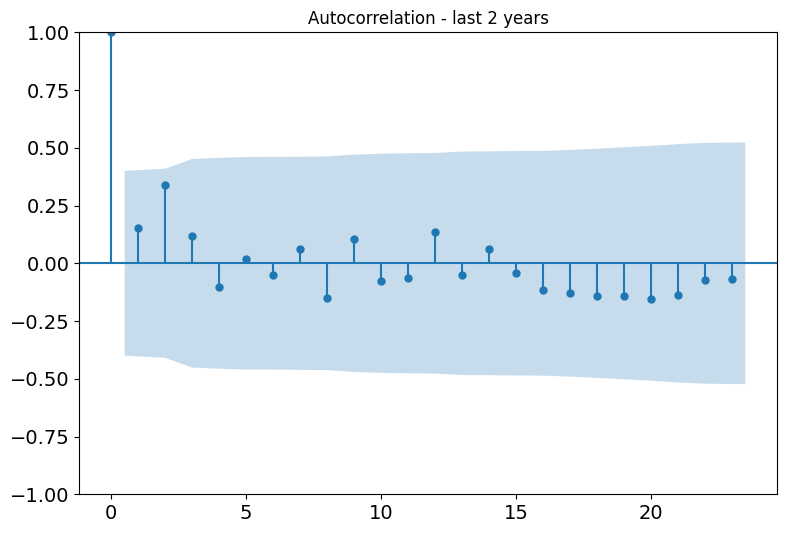

In [ ]:
# plot ACF for shortened version of WON_REVENUE
plot_acf(won_revenue_shortened,lags=23, title='Autocorrelation - last 2 years');

In [ ]:
# ADF test to test autocorrelation within shortened version of WON_REVENUE
ad_fuller_result = adfuller(won_revenue_shortened)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.0136237405068114
p-value: 0.7482629797225187


-> result indicated the series needs differencing

In [ ]:
# ADF test on differenced series (d=1)
ad_fuller_result = adfuller(won_revenue_shortened.diff(1).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.8454773478393635
p-value: 0.8053972317882251


In [ ]:
# ADF test on seasonally differenced series (D=1)
ad_fuller_result = adfuller(won_revenue_shortened.diff(12).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.6713483848449113
p-value: 0.8540320395030736


In [ ]:
# ADF test on multiply differenced series (d=2)
ad_fuller_result = adfuller(won_revenue_shortened.diff(1).dropna().diff(1).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.29390284290990326
p-value: 0.9263634440275866


In [ ]:
# ADF test on multiply differenced series (d=1, D=1)
ad_fuller_result = adfuller(won_revenue_shortened.diff(1).dropna().diff(12).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.006058536725681
p-value: 2.1588511189989817e-05


In [ ]:
# plot differenced series
plt.figure(figsize=[15, 7.5])
plt.plot(won_revenue_shortened.diff(1).dropna().diff(12).dropna())
plt.ylabel('Won Revenue diff ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### C1

In [ ]:
# load dataset
worksheet = gc.open('C1').sheet1
rows = worksheet.get_all_values()

# create DataFrame that includes all data on WON_REVENUE from the dataset
df = pd.DataFrame.from_records(rows[1:],columns=rows[0])
df['VALUE'] = pd.to_numeric(df['VALUE'])
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

In [ ]:
# remove splits i.e., group data only by date and metric
df = pd.DataFrame(df.groupby(['DATE','METRIC'])['VALUE'].sum())
df = df.reset_index()
df

In [ ]:
# use only train set, i.e., remove data from 2022
df = df[df['DATE']<pd.Timestamp('2022-01-01')]

In [ ]:
# pivot data
df = df.pivot(index=['DATE'],columns=['METRIC'],values=['VALUE'])
df.columns = [col[1] for col in df.columns]
df

In [ ]:
# print summary statistics
df.describe()

In [ ]:
# ensuring that no empty values are present in the data
print('Number of NaN values in CREATED_OPPORTUNITIES:',len(df[df['CREATED_OPPORTUNITIES'].isnull()]))
print('Number of NaN values in THREE_MONTHS_ACV:',len(df[df['THREE_MONTHS_ACV'].isnull()]))
print('Number of NaN values in THREE_MONTHS_OPP_WON_CVR:',len(df[df['THREE_MONTHS_OPP_WON_CVR'].isnull()]))
print('Number of NaN values in WON_CUSTOMERS:',len(df[df['WON_CUSTOMERS'].isnull()]))
print('Number of NaN values in WON_REVENUE:',len(df[df['WON_REVENUE'].isnull()]))

Number of NaN values in CREATED_OPPORTUNITIES: 0
Number of NaN values in THREE_MONTHS_ACV: 0
Number of NaN values in THREE_MONTHS_OPP_WON_CVR: 0
Number of NaN values in WON_CUSTOMERS: 0
Number of NaN values in WON_REVENUE: 0


In [ ]:
# scale data to get an overview of the distribution of each metric
minMax = MinMaxScaler()
df_scaled = pd.DataFrame(minMax.fit_transform(df),index=df.index,columns=df.columns)
df_scaled.head()

,CREATED_OPPORTUNITIES,THREE_MONTHS_ACV,THREE_MONTHS_OPP_WON_CVR,WON_CUSTOMERS,WON_REVENUE
DATE,,,,,
2021-01-01,0.233333,0.000000,0.424882,0.500,0.145784
2021-02-01,0.000000,0.013778,0.474178,0.125,0.018916
2021-03-01,0.033333,0.132619,1.000000,0.250,0.071378
2021-04-01,0.500000,0.089169,0.671361,0.375,0.192933
2021-05-01,0.533333,0.104832,0.663892,0.250,0.037137


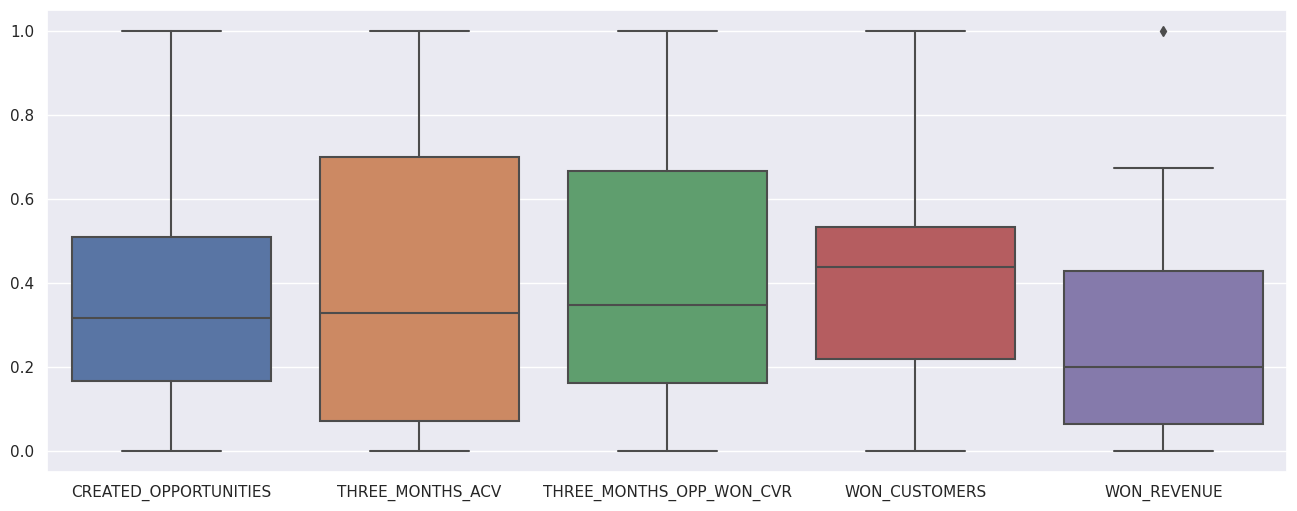

In [ ]:
# print boxplot across metrics
sns.set(rc={'figure.figsize':(16,6)})
sns.boxplot(data=df_scaled);

In [ ]:
# print variance per metric (unscaled)
df.var()

In [ ]:
# print variance per metric (scaled)
df_scaled.var()

CREATED_OPPORTUNITIES       0.078709
SIX_MONTHS_ACV              0.059840
SIX_MONTHS_OPP_WON_CVR      0.041257
THREE_MONTHS_ACV            0.030322
THREE_MONTHS_OPP_WON_CVR    0.034442
WON_CUSTOMERS               0.060041
WON_REVENUE                 0.036711
dtype: float64

In [ ]:
# create new DataFrame which only includes WON_REVENUE
won_revenue = df[['WON_REVENUE']].copy()
won_revenue_scaled = df_scaled[['WON_REVENUE']].copy()
won_revenue.head()

In [ ]:
# plot WON_REVENUE
won_revenue.plot(figsize=(15,7.5))
plt.grid(axis='y')
plt.title('C6',fontsize=20)
plt.xlabel('DATE', fontsize=20)
plt.ylabel('WON_REVENUE', fontsize=20)
plt.show()

In [ ]:
# print boxplot only for WON_REVENUE
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(data=won_revenue);

In [ ]:
# print lag plot
lag_plot(won_revenue)
plt.grid()
plt.show()

In [ ]:
# execute time-series decomposition and plot the result
result=seasonal_decompose(won_revenue['WON_REVENUE'], model='additive', period=12)
result.plot();

ValueError: ignored

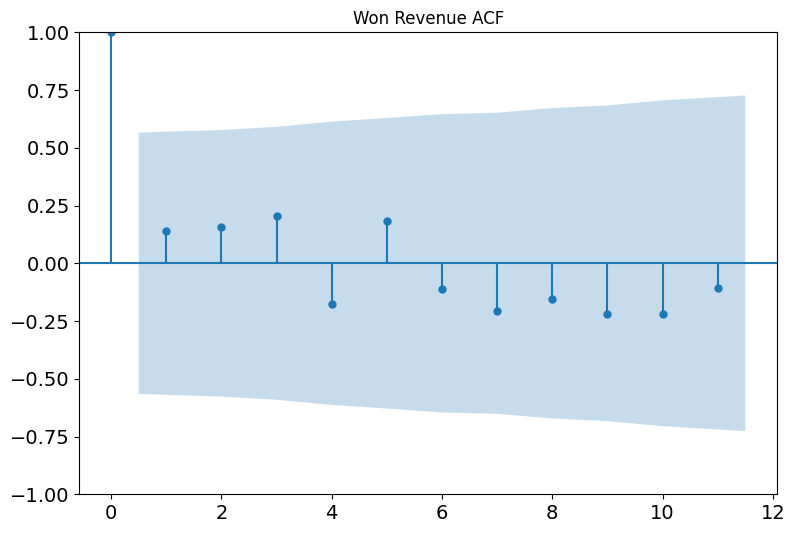

In [ ]:
# plot ACF for WON_REVENUE
plot_acf(won_revenue,lags=11, title='Won Revenue ACF')
plt.show()

In [ ]:
# ADF test to test autocorrelation within WON_REVENUE
ad_fuller_result = adfuller(won_revenue)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.003341392157271731
p-value: 0.9582548813978733


-> result indicated the series needs differencing

In [ ]:
# ADF test on differenced series (d=1)
ad_fuller_result = adfuller(won_revenue.diff(1).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.208288216530695
p-value: 0.2032510768119219


In [ ]:
# ADF test on seasonally differenced series (D=1)
ad_fuller_result = adfuller(won_revenue.diff(12).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ValueError: ignored

In [ ]:
# ADF test on multiply differenced series (d=2)
ad_fuller_result = adfuller(won_revenue.diff(1).dropna().diff(1).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.625803430014851
p-value: 1.118145810897647e-06


-> results indicate to use second-level differencing

In [ ]:
# plot differenced series
plt.figure(figsize=[15, 7.5])
plt.plot(won_revenue.diff(1).dropna().diff(1).dropna())
plt.ylabel('WON_REVENUE diff')
plt.xlabel('DATE')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()